In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('crimes.csv')
df.shape

(568293, 10)

In [66]:
df.head(-5)

,dt,region,police_district,police_merhav,police_station,crime_group,crime_type,tikim_sum,social_rank,population
0,2018-01-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,199,6,52285
1,2018-04-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,301,6,52285
2,2018-07-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,348,6,52285
3,2018-10-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,254,6,52285
4,2019-01-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,281,6,52285
...,...,...,...,...,...,...,...,...,...,...
568283,2021-10-01,רמת השרון,מחוז תא,מרחב ירקון תא,תחנת תא צפון ירקון,עבירות כלפי הרכוש,גניבה שמוש רכב ללא רשות,1,9,47093
568284,2021-10-01,רמת השרון,מחוז תא,מרחב ירקון תא,תחנת תא צפון ירקון,עבירות כלפי הרכוש,גניבת אופניים,1,9,47093
568285,2021-10-01,רמת השרון,מחוז תא,מרחב ירקון תא,תחנת תא צפון ירקון,עבירות כלפי הרכוש,גרימת נזק לרכוש בזדון,1,9,47093
568286,2021-10-01,רמת השרון,מחוז תא,מרחב ירקון תא,תחנת תא צפון ירקון,עבירות כלפי הרכוש,החזקת כלי פריצה,1,9,47093


In [126]:
df.columns

Index(['dt', 'region', 'police_district', 'police_merhav', 'police_station',
       'crime_group', 'crime_type', 'tikim_sum', 'social_rank', 'population'],
      dtype='object')

In [67]:
# מספר הערים בסקר, מספר האזורים ודרוג סוציאלי 
df['region'].nunique(), df['police_district'].nunique(), df['social_rank'].nunique()
print(f'num of regions {df["region"].nunique()}, num of districts: {df["police_district"].nunique()} and range of social ranking: 0 - {df["social_rank"].nunique()}')

num of regions 163, num of districts: 7 and range of social ranking: 0 - 9


In [68]:
# range of inspection
(df['dt'].min(), df['dt'].max())

('2018-01-01', '2023-01-01')

In [69]:
from joypy import joyplot

In [140]:
# first: create object to plot, in this case it is normalized number of cases per region and social rank
to_plot = (df.groupby(['region', 'social_rank'], as_index=False)
           .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())).rename(columns={None: 'tikim_norm'})

In [141]:
to_plot

,region,social_rank,tikim_norm
0,אבן יהודה,9,0.135062
1,אופקים,3,0.244439
2,אור יהודה,5,0.236464
3,אור עקיבא,5,0.264549
4,אזור,7,0.182343
...,...,...,...
123,שגב שלום,1,0.348939
124,שדרות,5,0.361670
125,שוהם,9,0.079259
126,תל אביב יפו,8,0.426606


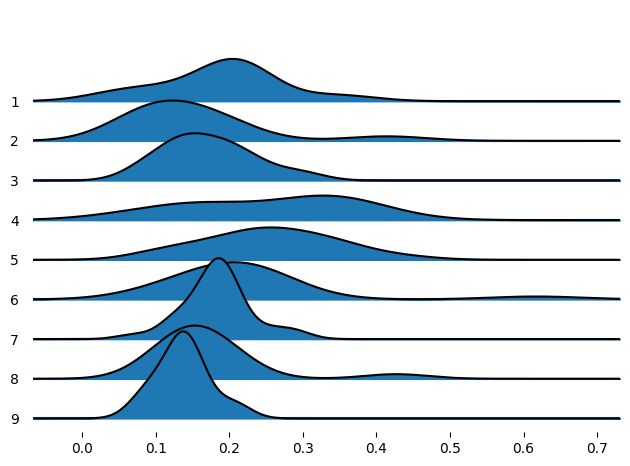

In [72]:
joyplot(to_plot, by='social_rank',column='tikim_normal');

In [73]:
""" Data do not behave as though: as higher the social rank, the lower the crime cases per capita
The primery suspect: NaN that we saw in df.head, need to clearn the dataset"""

' Data do not behave as though: as higher the social rank, the lower the crime cases per capita\nThe primery suspect: NaN that we saw in df.head, need to clearn the dataset'

In [74]:
df.isna().mean()

dt                 0.00000
region             0.00000
police_district    0.00000
police_merhav      0.00000
police_station     0.00000
crime_group        0.00691
crime_type         0.00691
tikim_sum          0.00000
social_rank        0.00000
population         0.00000
dtype: float64

In [75]:
""" we see that under crime_group and crime_type the report is not full and detailed (NaN)"""

' we see that under crime_group and crime_type the report is not full and detailed (NaN)'

In [76]:
""" Maybe even something worst is correlated in low social rank cities that too much activity/crime leads to sloppy reports"""

' Maybe even something worst is correlated in low social rank cities that too much activity/crime leads to sloppy reports'

In [77]:
# is crime type and crime group exactly relate in missing reports?
(df['crime_type'].isna() == df['crime_group'].isna()).all()
# Yes

True

<Axes: xlabel='norm cases', ylabel='Frequency'>

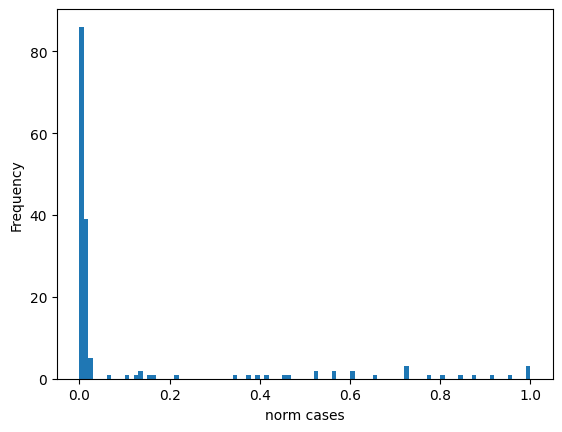

In [78]:
# Are there cities that specifically mess up the data?
to_plot = df.groupby('region').apply(lambda gp: gp['crime_type'].isna().mean())
to_plot.plot.hist(bins=100,xlabel='norm cases')
# we see that there are several problematic cities in reports. May be agressivly delete them will improve our hypothesis

<Axes: ylabel='Frequency'>

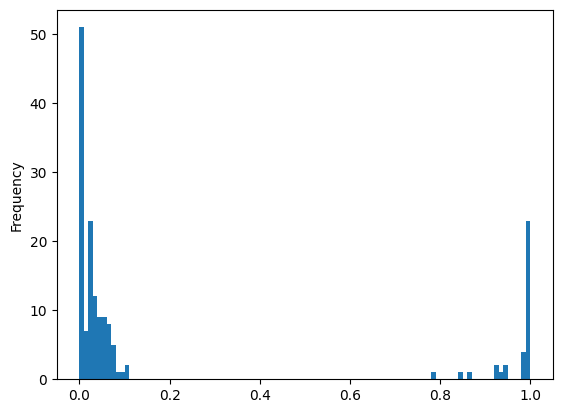

In [79]:
# We sum up the cases per cities ('region') that crime type is NaN from total cases (tikim)
to_plot = df.groupby('region').apply(lambda gp: gp[gp['crime_type'].isna()]['tikim_sum'].sum() / gp['tikim_sum'].sum())
to_plot.plot.hist(bins=100)

In [80]:
#It is obviouse that there are some cities that are outliers and contribute to bad reports
# we will delete them and look at the data after deleting them

In [81]:
df = df.groupby('region').filter(lambda gp: gp[gp['crime_type'].isna()]['tikim_sum'].sum() /
                                 gp['tikim_sum'].sum()< 0.5)

In [82]:
to_plot = (df.groupby(['region', 'social_rank'], as_index=False)
           .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())).rename(columns={None: 'tikim_normal'})
to_plot

,region,social_rank,tikim_normal
0,אבן יהודה,9,0.135062
1,אופקים,3,0.244439
2,אור יהודה,5,0.236464
3,אור עקיבא,5,0.264549
4,אזור,7,0.182343
...,...,...,...
123,שגב שלום,1,0.348939
124,שדרות,5,0.361670
125,שוהם,9,0.079259
126,תל אביב יפו,8,0.426606


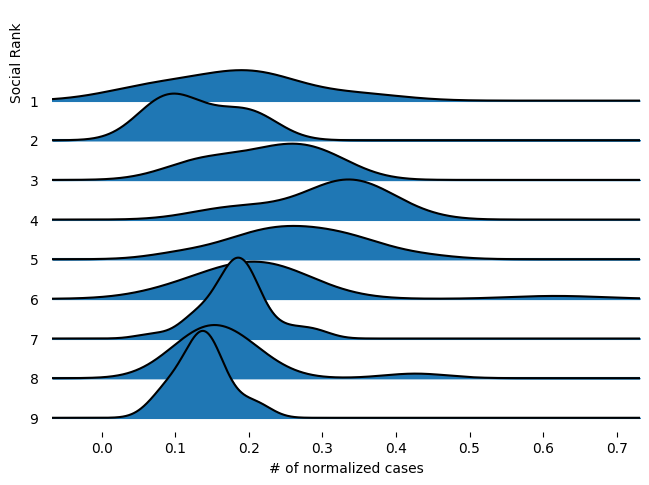

In [83]:
fig, axes = joyplot(to_plot, by='social_rank',  column='tikim_normal');
plt.xlabel('# of normalized cases')
axes[0].set_ylabel('Social Rank')

# Show the plot
plt.show()

In [84]:
# not specific fix
# try to filter it according to the 3 low social rank and look and num of cases/capita
to_plot[to_plot['social_rank'] <=3].sort_values('tikim_normal')

,region,social_rank,tikim_normal
53,מודיעין עילית,1,0.046653
118,רכסים,2,0.078042
15,ביתר עילית,1,0.083757
6,אלעד,2,0.084147
16,בני ברק,2,0.098156
51,מג'דל שמס,3,0.121299
43,כסיפה,1,0.136968
14,בית שמש,2,0.137902
42,כאבול,3,0.158709
33,חורה,1,0.181358


In [85]:
#May be we need to change hypothesis since say about 5 points (under 0.1) will not change things radically
# we need to look at sub fields in each region and anlyze differently to find other correlations
# lets watch different data segment, פילוח שונה בניואנסים
# lets look on crime types

In [99]:
# we call it df_train since we will do a type of training
df_to_train = (df.groupby(['region', 'crime_type','social_rank'], as_index=False)
           .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())).rename(columns={None: 'tikim_norm'})
df_to_train

,region,crime_type,social_rank,tikim_norm
0,אבן יהודה,(תקיפה (למעט עובדי ציבור,9,0.012239
1,אבן יהודה,איומים,9,0.018358
2,אבן יהודה,"גידול,ייצור והפקת-סמים",9,0.000364
3,אבן יהודה,גניבה מתוך רכב,9,0.004517
4,אבן יהודה,"גניבה ע""י עובדים וסוכנים",9,0.000073
...,...,...,...,...
9743,תל מונד,שוחד,9,0.000076
9744,תל מונד,שמוש בסמים מסוכנים,9,0.005250
9745,תל מונד,תקיפה לשם גניבה,9,0.000076
9746,תל מונד,תקיפת והכשלת שוטר,9,0.001826


In [114]:
# lets examine, is there a correlation to social rank? 
# we have to bear in mind that social_rank is ordinal not numerical, thus spearman correlation will 
# fit to do ordinal correlation
from scipy.stats import spearmanr

ans = []

for crime in df_to_train['crime_type'].unique():
    df_crime = df_to_train[df_to_train['crime_type'] == crime]
    if len(df_crime)<10: continue
    spearman, pval = spearmanr(df_crime['social_rank'], df_crime['tikim_norm'])
    ans.append({'crime_type': crime, 
               'spearman': spearman,
               'pval': pval})

In [132]:
alpha = 0.05
# when we take alpha that says if it happens under 1/20 than it is significant but we use multiple
# comparisons so we need to fix alpha to be related to the comparisons we do and the simple fix is to take the alpha values and divid by the number of comparisons we
# do
ans = pd.DataFrame(ans).sort_values('pval')
ans = ans[ans['pval']<alpha/len(ans)]
ans.sort_values('spearman')
# and we see it dropped down the number of significant crime_types

,crime_type,spearman,pval
73,תקיפת שוטר בנסיבות חמורות,-0.633580,1.427418e-13
104,עבירות הנוגעות לנשואין,-0.601737,1.314667e-04
26,סטיסטי כל השאר,-0.599270,7.836588e-14
19,חבלה גופנית חמורה,-0.585154,4.061729e-13
15,הצתה,-0.523749,2.640501e-10
48,תקיפת והכשלת שוטר,-0.519593,3.286100e-10
35,עבירות נגד הסדר הצבורי,-0.518107,3.763584e-10
41,קטטות והפרעות ברחובות,-0.485683,7.130262e-09
89,התקהלות או התאגדות,-0.484651,5.225970e-06
81,נשיאה וייצור סכינים ופגיונות,-0.447119,4.336824e-04


<Axes: xlabel='social_rank', ylabel='tikim_norm'>

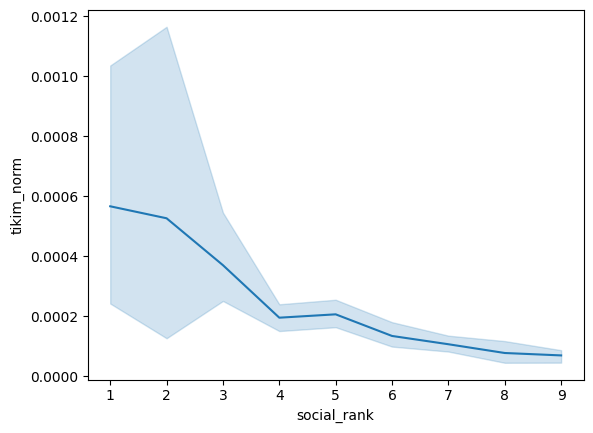

In [137]:
import seaborn as sns
df_crime = df_to_train[df_to_train['crime_type'] == 'תקיפת שוטר בנסיבות חמורות']
sns.lineplot(x=df_crime['social_rank'], y=df_crime['tikim_norm'])